![](https://pm4py.fit.fraunhofer.de/static/assets/images/pm4py-site-logo-padded.png)

# <b>Introduction<b>

Process Discovery algorithms want to find a suitable process model that describes the order of events/activities that are executed during a process execution.

# <b>1. Setup</b>

## <b>1.1. Packages</b>

In [81]:
# python ######################################################################
import sys
import os
import datetime

# basics ######################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# widgets #####################################################################
import ipywidgets as widgets
from ipywidgets import interact

# process mining ##############################################################
import pm4py

# object.log
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.importer.xes import importer as xes_importer

# object.conversion
from pm4py.objects.conversion.dfg import converter as dfg_converter
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.objects.conversion.wf_net.variants import to_bpmn, to_process_tree


# algo.discovery
from pm4py.algo.discovery.alpha import variants
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.correlation_mining import algorithm as correlation_miner
from pm4py.algo.discovery.temporal_profile import algorithm as temporal_profile_discovery


# algo.conformance
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
# vizualization
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer


# util
from pm4py.util import vis_utils


# Define directories
from src import DATA_DIR, IMAGE_DIR

import warnings
warnings.filterwarnings("ignore")

<br><br>
## <b>1.2. Setting</b>

In [82]:
pd.set_option('display.max_rows', 50)

In [83]:
sns.set_theme()

<br><br>
## <b>1.3. Import Event Log</b>

In [84]:
log = xes_importer.apply(str(DATA_DIR / 'Example/Running_Example/running-example.xes'))

log_csv = pd.read_csv(DATA_DIR / 'Example/Running_Example/running-example.csv', sep=';')
pm4py.format_dataframe(
    log_csv,
    case_id = 'case_id',
    activity_key = 'activity',
    timestamp_key = 'timestamp', 
    timest_format = '%Y-%m-%d %H:%M:%S%z'
)

log_csv.head()

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

,case_id,activity,timestamp,costs,resource,case:concept:name,concept:name,time:timestamp
0,3,register request,2010-12-30 13:32:00+00:00,50,Pete,3,register request,2010-12-30 13:32:00+00:00
1,3,examine casually,2010-12-30 14:06:00+00:00,400,Mike,3,examine casually,2010-12-30 14:06:00+00:00
2,3,check ticket,2010-12-30 15:34:00+00:00,100,Ellen,3,check ticket,2010-12-30 15:34:00+00:00
3,3,decide,2011-01-06 08:18:00+00:00,200,Sara,3,decide,2011-01-06 08:18:00+00:00
4,3,reinitiate request,2011-01-06 11:18:00+00:00,200,Sara,3,reinitiate request,2011-01-06 11:18:00+00:00


<br></br>
# <b>2. Process Dicovery</b>

In the following, we made up an overview to visualize the advantages and disadvantages of the mining algorithms.

Alpha   | Alpha+   | Heuristic   | Inductive  
------   | ------   | ------   | ------   
Cannot handle loops of length one and length two | Can handle loops of length one and length two | Takes frequency into account | Can handle invisible tasks
Invisible and duplicated tasks cannot be discovered | Invisible and duplicated tasks cannot be discovered | Detects short loops | Model is sound
Discovered model might not be sound | Discovered model might not be sound | Does not guarantee a sound model | Most used process mining algorithm
Weak against noise | Weak against noise | |

<br></br>
## <b>2.1 Alpha Miner</b>

The alpha miner is one of the most known Process Discovery algorithm and is able to find:

- A [Petri net](https://en.wikipedia.org/wiki/Petri_net) model where all the transitions are visible and unique and correspond to classified events (for example, to activities).
- An initial marking that describes the status of the Petri net model when an execution starts.
- A final marking that describes the status of the Petri net model when an execution ends.

<br></br>

<span style="font-size:larger;"><b> Alpha Miner Disadvantages:
- **Cannot** handle loops of length one and length two
- Invisible and duplicated tasks cannot be discovered
- Discovered model might not be sound
- Weak against noise

<br></br>
### <b>2.1.1. Default<b>

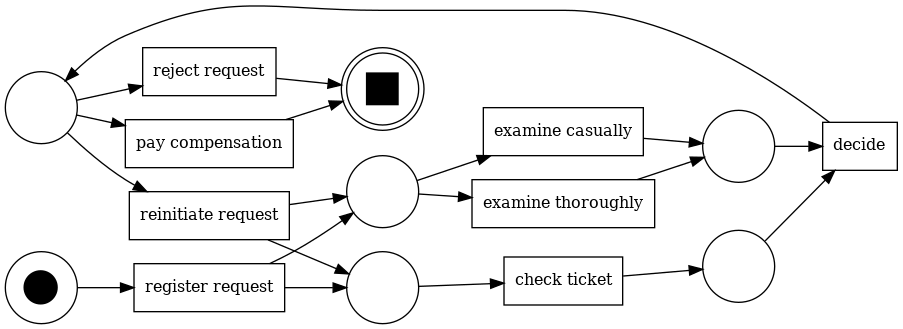

In [85]:
# Miner
petri_net, initial_marking, final_marking = alpha_miner.apply(log, variant=variants.classic)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/alpha_miner_classic_petri_default.png')

# View
pn_visualizer.view(gviz)

<br></br>
### <b>2.1.2. Performance</b>

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

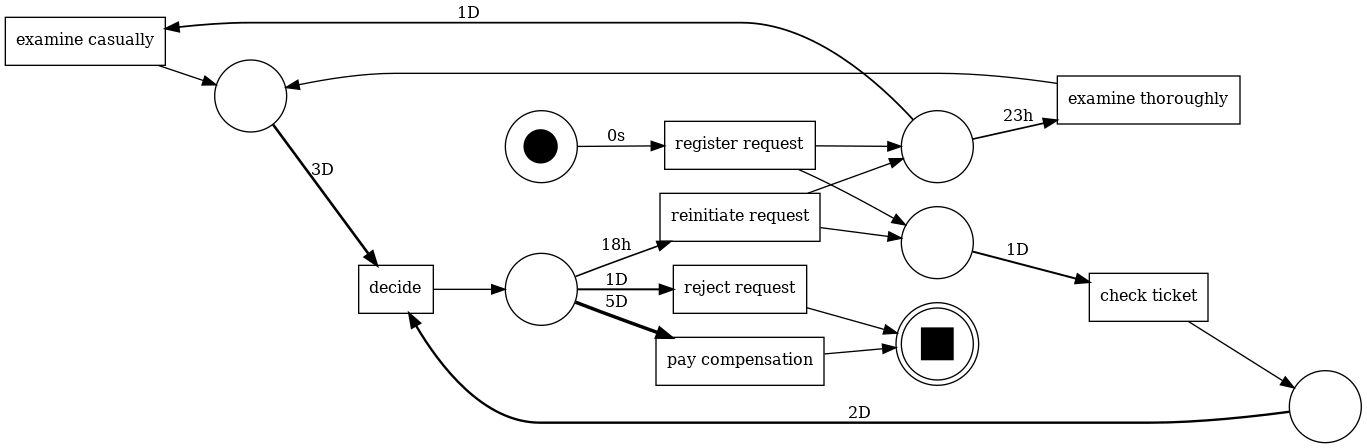

In [86]:
# Miner
petri_net, initial_marking, final_marking = alpha_miner.apply(log, variant=variants.classic)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking, 
                           variant=pn_visualizer.Variants.PERFORMANCE,
                           log=log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/alpha_miner_classic_petri_performance.png')

# View
pn_visualizer.view(gviz)

<br></br>
### <b>2.1.3. Frequency</b>

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

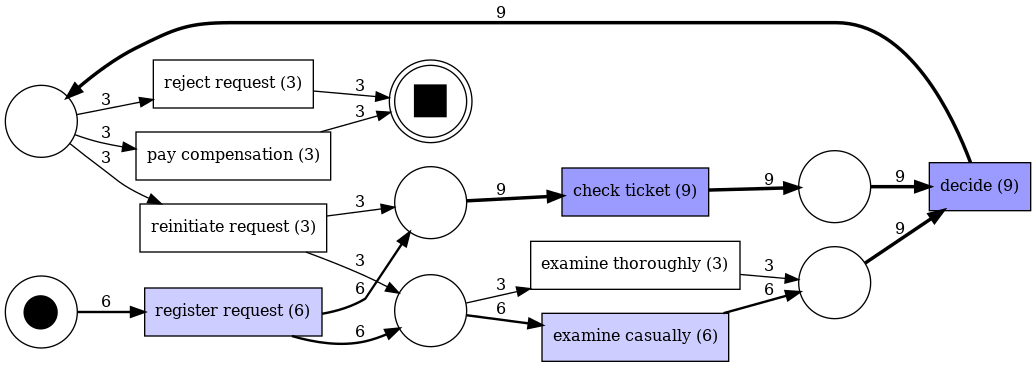

In [87]:
# Miner
petri_net, initial_marking, final_marking = alpha_miner.apply(log, variant=variants.classic)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking, 
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/alpha_miner_classic_petri_frequency.png')

# View
pn_visualizer.view(gviz)

<br></br>
## <b>2.2 Alpha+ Miner</b>

- **Can** handle loops of length one and length two
- Invisible and duplicated tasks cannot be discovered
- Discovered model might not be sound
- Weak against noise

<br></br>
### <b>2.2.1. Default<b>

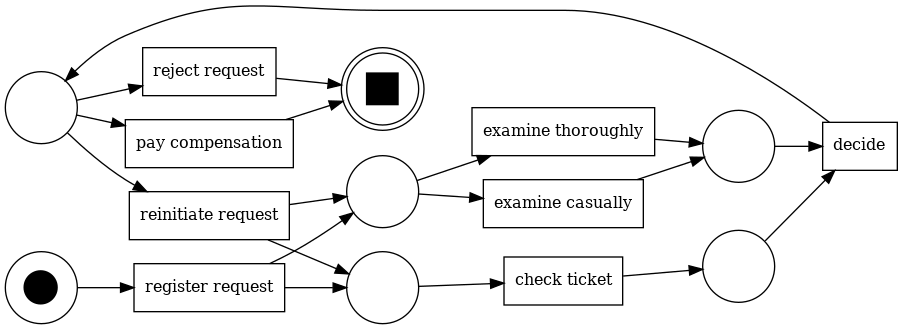

In [88]:
# Miner
petri_net, initial_marking, final_marking = alpha_miner.apply(log, variant=variants.plus)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/alpha_miner_plus_petri_default.png')

# View
pn_visualizer.view(gviz)

<br></br>
### <b>2.2.2. Performance<b>

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

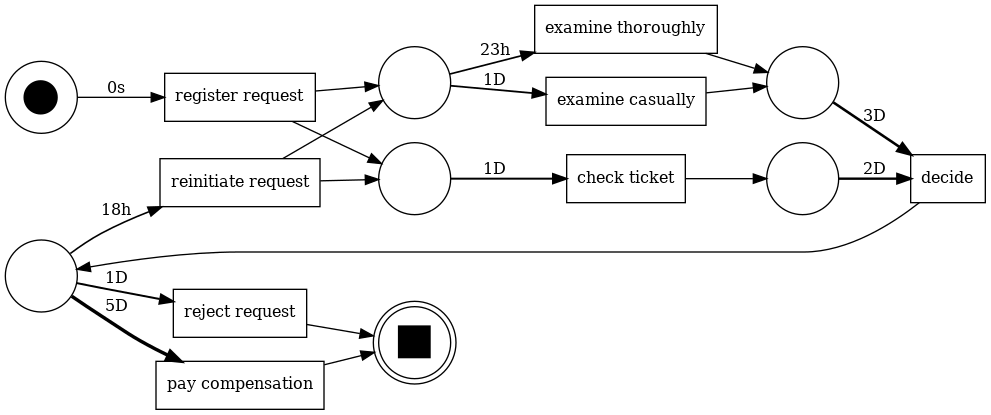

In [89]:
# Miner
petri_net, initial_marking, final_marking = alpha_miner.apply(log, variant=variants.plus)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking, 
                           variant=pn_visualizer.Variants.PERFORMANCE,
                           log=log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/alpha_miner_plus_petri_performance.png')

# View
pn_visualizer.view(gviz)

<br></br>
### <b>2.2.3. Frequency<b>

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

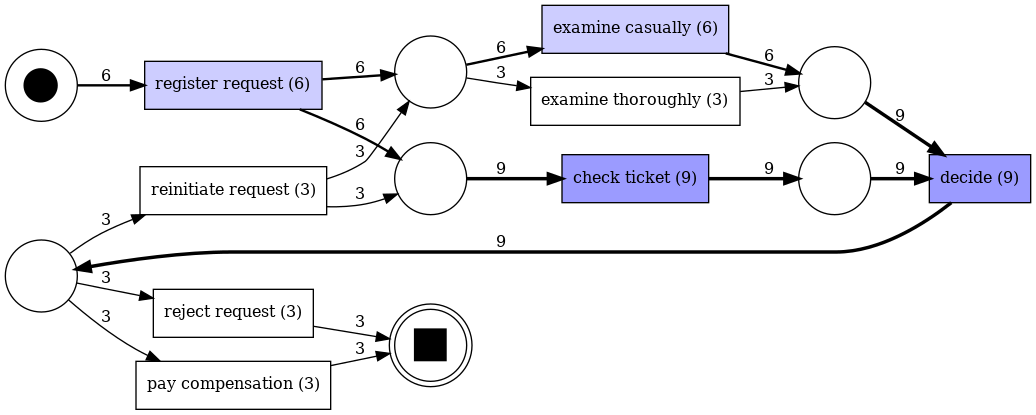

In [90]:
# Miner
petri_net, initial_marking, final_marking = alpha_miner.apply(log, variant=variants.plus)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking, 
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/alpha_miner_plus_petri_frequency.png')

# View
pn_visualizer.view(gviz)

<br></br>
## <b>2.3 Heuristic Miner</b>

- Takes frequency into account
- Detects short loops
- Does not guarantee a sound model

<br></br>
### <b>2.3.1. Implicit Default Parameters _ (Performance)</b>

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

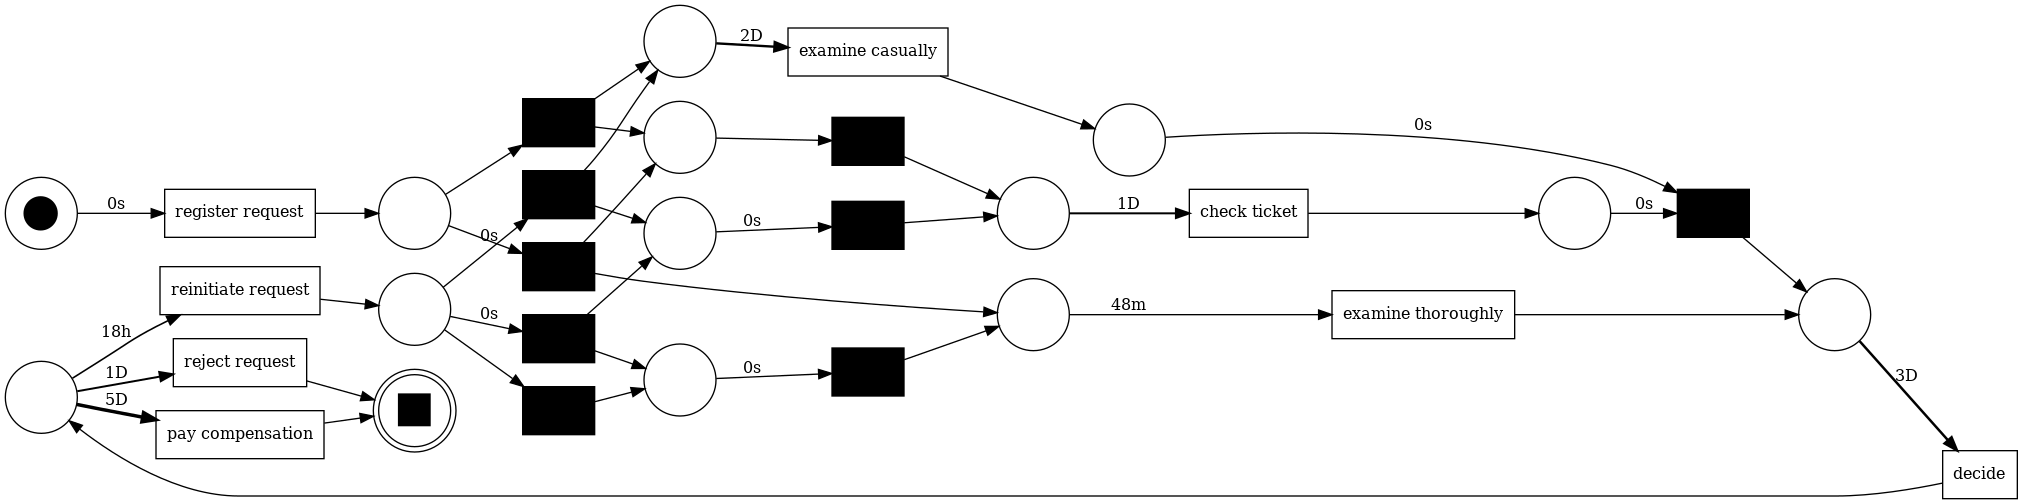

In [91]:
# Miner
petri_net, initial_marking, final_marking = heuristics_miner.apply(log)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking,
                           variant=pn_visualizer.Variants.PERFORMANCE, 
                           log=log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/heuristic_miner_1.png')

# View
pn_visualizer.view(gviz)

<br></br>
### <b>2.3.2. Implicit Default Parameters _ (Frequency)</b>

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

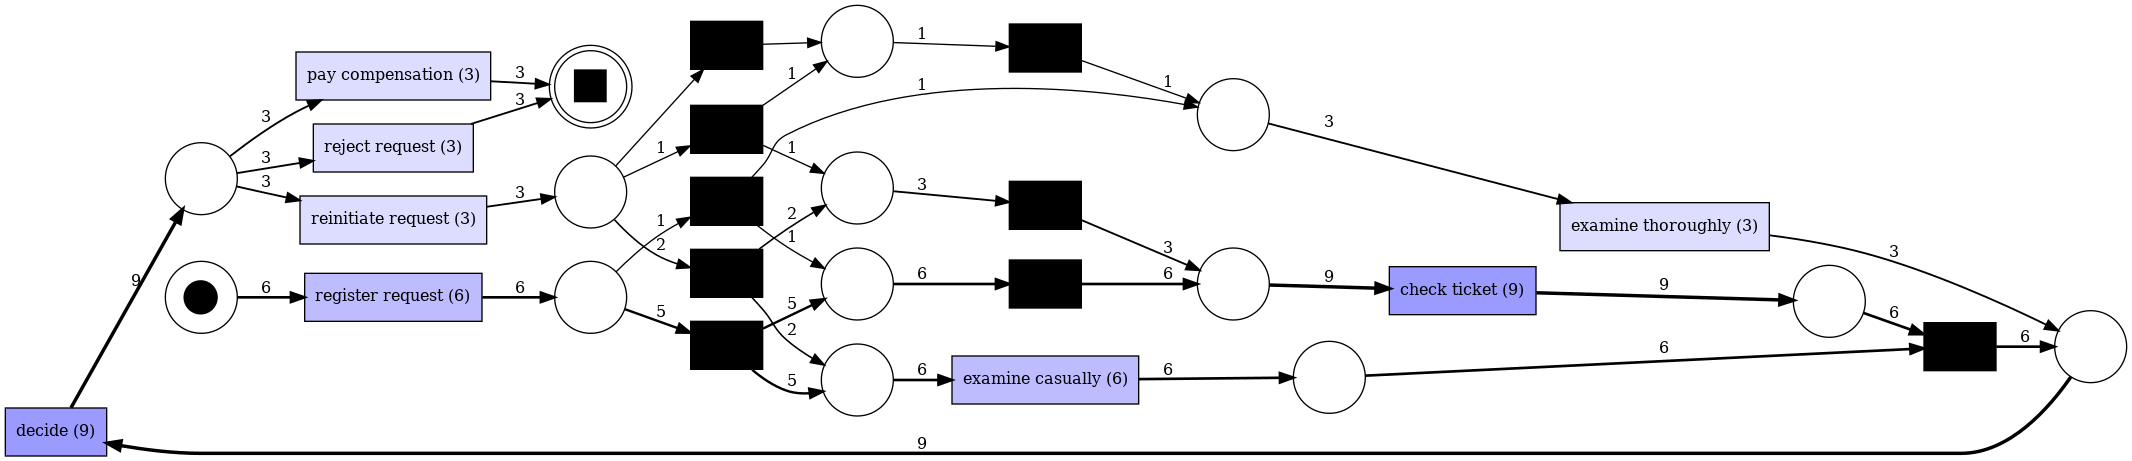

In [92]:
# Miner
petri_net, initial_marking, final_marking = heuristics_miner.apply(log)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking,
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/heuristic_miner_2.png')

# View
pn_visualizer.view(gviz)

<br></br>
### <b>2.3.3. Explicit Default Parameters _ (Performance)</b>

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

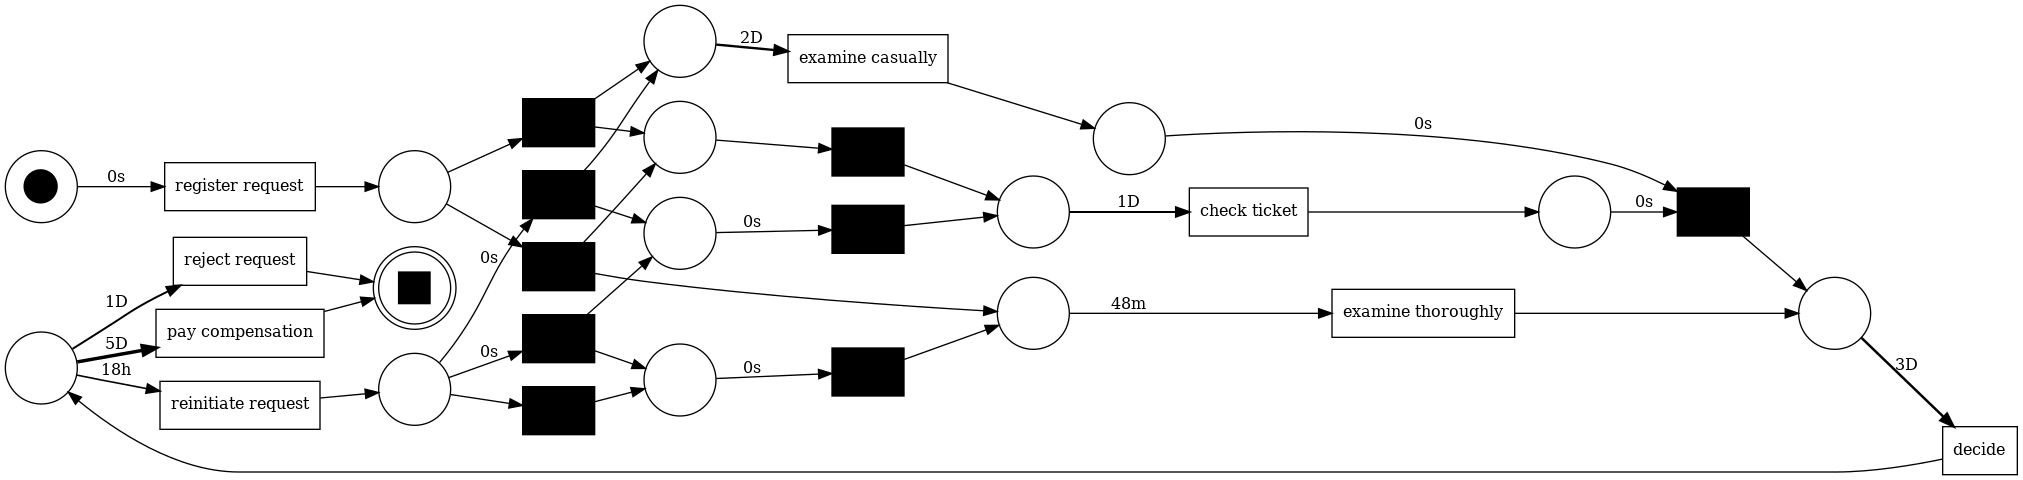

In [93]:
# Parameters
parameters = heuristics_miner.Variants.CLASSIC.value.Parameters

# Miner
petri_net, initial_marking, final_marking = heuristics_miner.apply(
    log,
    parameters={
        parameters.DEPENDENCY_THRESH: 0.5,
        parameters.AND_MEASURE_THRESH: 0.65,
        parameters.LOOP_LENGTH_TWO_THRESH: 0.5
    }
)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking,
                           variant=pn_visualizer.Variants.PERFORMANCE, 
                           log=log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/heuristic_miner_3.png')

# View
pn_visualizer.view(gviz)

<br></br>
### <b>2.3.4. Explicit Default Parameters _ (Frequency)</b>

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

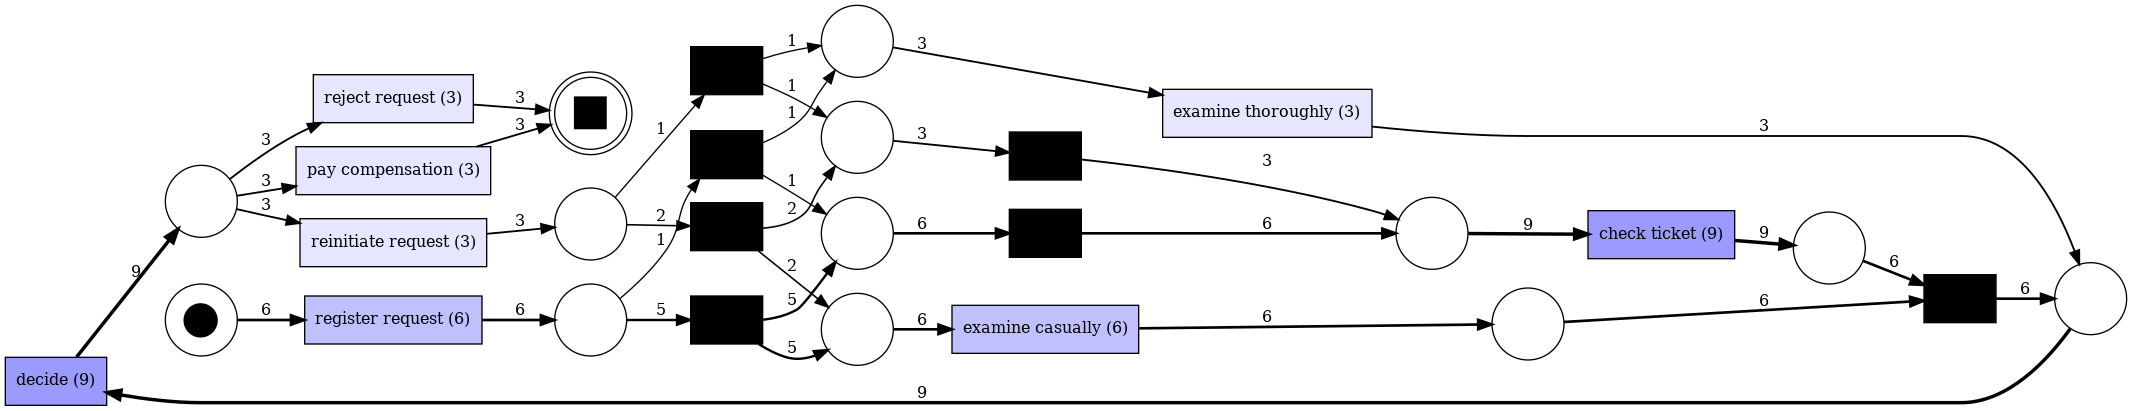

In [94]:
# Parameters
parameters = heuristics_miner.Variants.CLASSIC.value.Parameters

# Miner
petri_net, initial_marking, final_marking = heuristics_miner.apply(
    log,
    parameters={
        parameters.DEPENDENCY_THRESH: 0.5, 
        parameters.AND_MEASURE_THRESH: 0.65,
        parameters.LOOP_LENGTH_TWO_THRESH: 0.5
    }
)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking,
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/heuristic_miner_3.png')

# View
pn_visualizer.view(gviz)

<br></br>
## <b>2.4. Inductive Miner</b>

- Can handle invisible tasks
- Model is sound
- Most used process mining algorithm

Process Mining for Python (PM4Py) offers an implementation of the inductive miner (IM), inductive miner infrequent (IMf) and inductive miner directly-follows (IMd) algorithm.

The basic idea of Inductive Miner is about detecting a 'cut' in the log (e.g. sequential cut, parallel cut, concurrent cut and loop cut) and then recur on sublogs, which were found applying the cut, until a base case is found. The Directly-Follows variant avoids the recursion on the sublogs but uses the Directly Follows graph.

Inductive miner models usually make extensive use of hidden transitions, especially for skipping/looping on a portion on the model. Furthermore, each visible transition has a unique label (there are no transitions in the model that share the same label).

Two process models can be derived: Petri Net and Process Tree.

<br>

### <b>2.4.1. Performance</b>

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

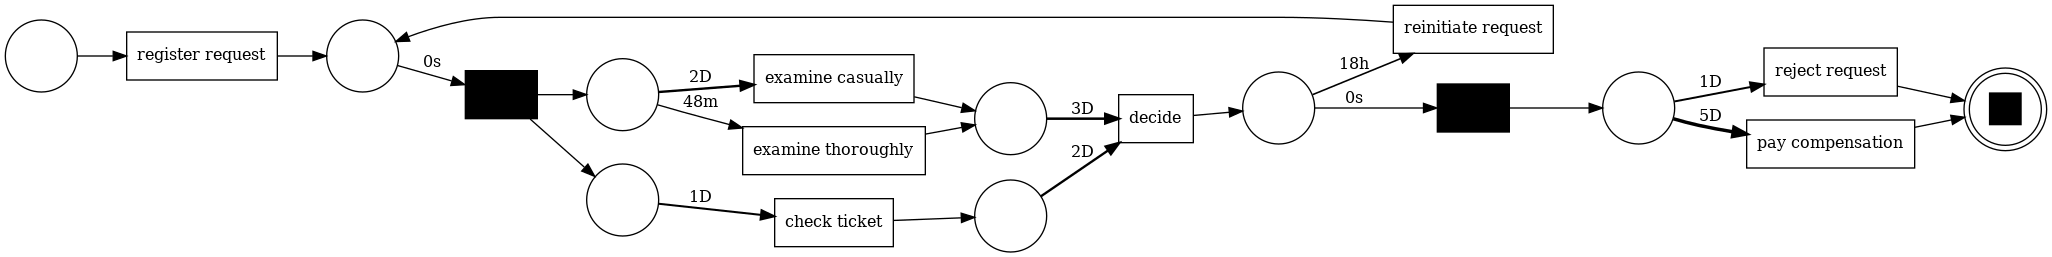

In [95]:
# Miner
petri_net, marking, final_marking = pm4py.discover_petri_net_inductive(log)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking,
                           variant = pn_visualizer.Variants.PERFORMANCE, 
                           log = log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/IM_performance_petri.png')

# View
pn_visualizer.view(gviz)

<br></br>
### <b>2.4.2. Frequency</b>

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

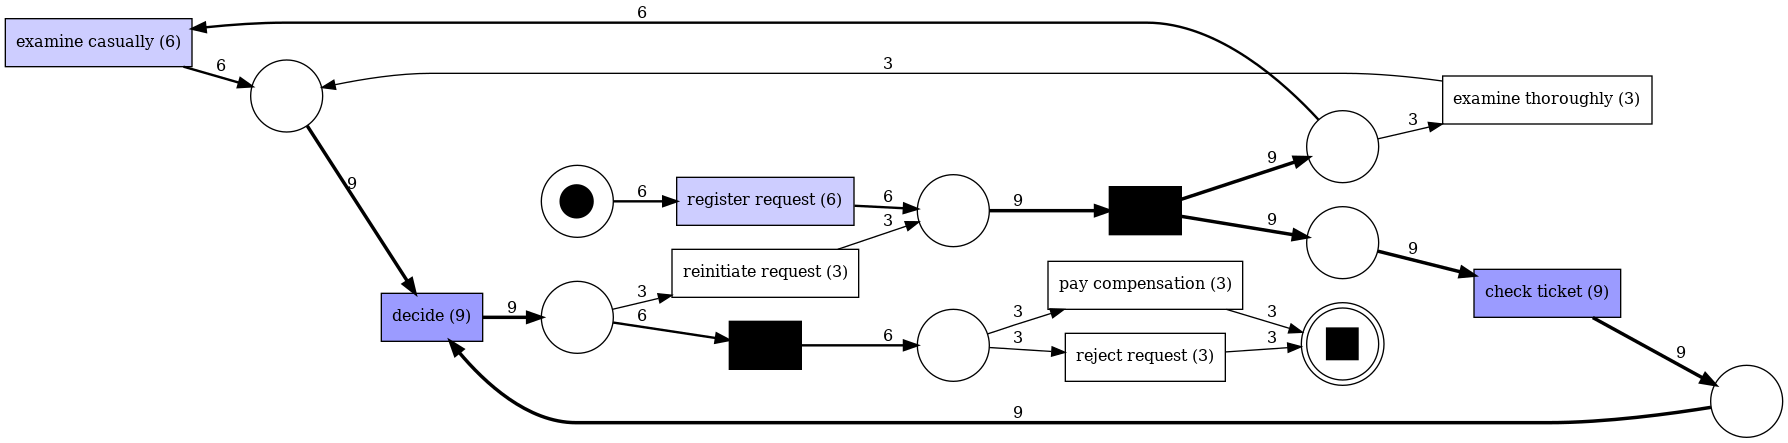

In [96]:
# Miner
petri_net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log)

# GraphViz
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking,
                           variant = pn_visualizer.Variants.FREQUENCY, 
                           log = log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/IM_frequency_petri.png')

# View
pn_visualizer.view(gviz)

<br></br>
# <b>3. Other Process Map Types<b>

## <b>3.1. Process Tree<b>

### <b>3.1.1. Convert Petri Net to Process Tree<b>

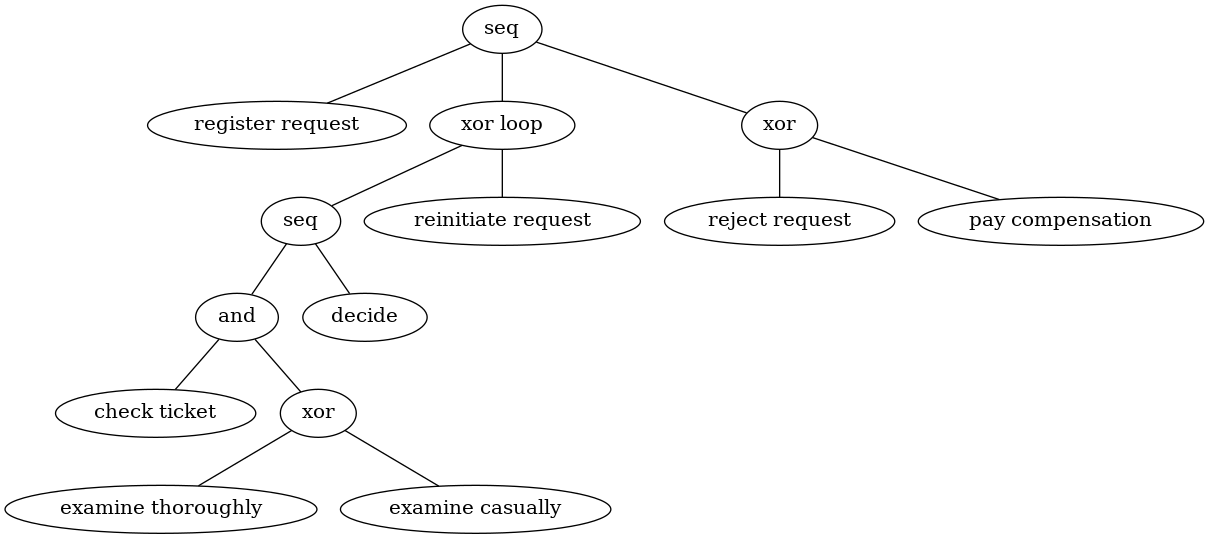

In [97]:
# Inductive Petri Net to process_tree

petri_net, marking, final_marking = pm4py.discover_petri_net_inductive(log)
process_tree = to_process_tree.apply(petri_net, marking, final_marking)
pm4py.view_process_tree(process_tree)

<br></br>
### <b>3.1.2. Convert Process Tree to Petri Net<b>

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

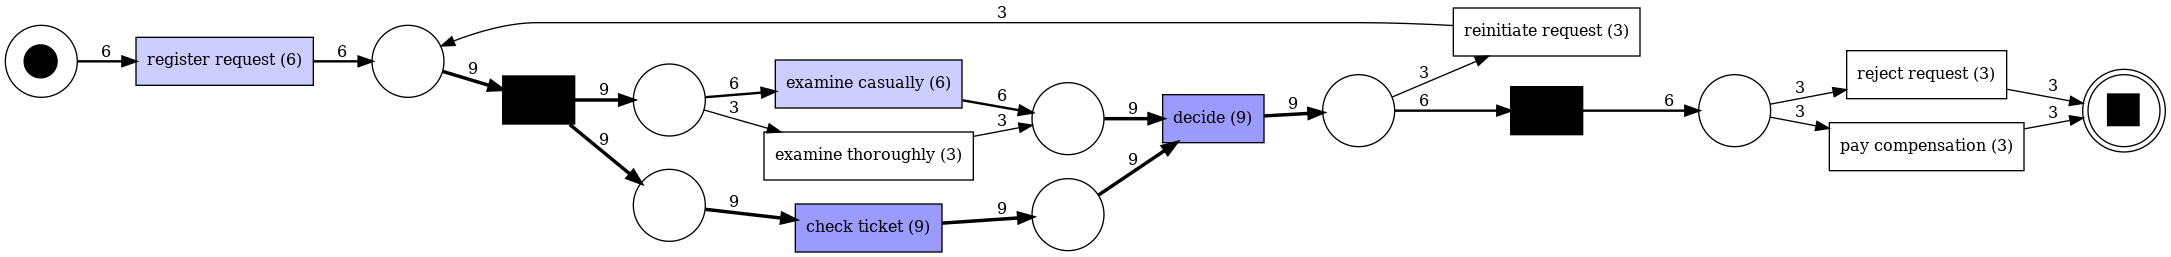

In [98]:
# Miner
tree = pm4py.discover_process_tree_inductive(log)

# Convert the process tree to a petri net
net, initial_marking, final_marking = pt_converter.apply(tree)


# GraphViz
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters={pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: 'png'}, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

# View
pn_visualizer.view(gviz)

<br></br>
## <b>3.2. BPMN<b>

### <b>3.2.1. Convert Petri Net to BPMN<b>

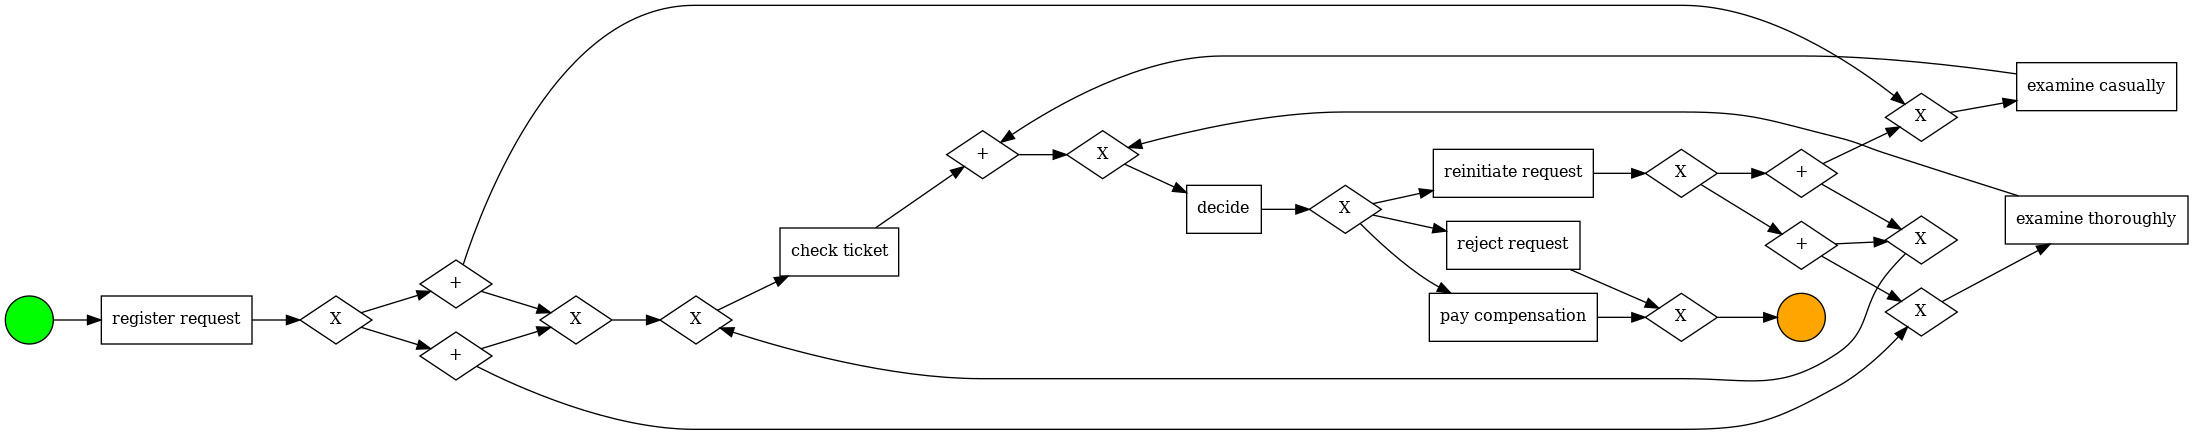

In [99]:
# Heuristics Petri Net to BPMN

petri_net, marking, final_marking = heuristics_miner.apply(log)

bpmn = to_bpmn.apply(petri_net, marking, final_marking)
pm4py.view_bpmn(bpmn)

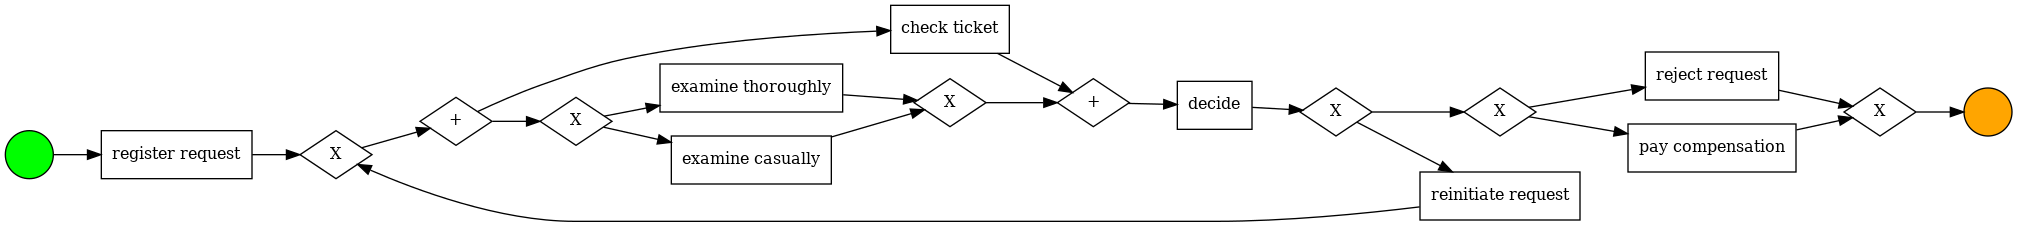

In [100]:
# Inductive Petri Net to BPMN

petri_net, marking, final_marking = pm4py.discover_petri_net_inductive(log)

bpmn = to_bpmn.apply(petri_net, marking, final_marking)
pm4py.view_bpmn(bpmn)

<br></br>
## <b>3.3 Directly-Follows Graph</b>

Directly-Follows graphs are graphs where the nodes represent the events/activities in the log and directed edges are present between nodes if there is at least a trace in the log where the source event/activity is followed by the target event/activity. On top of these directed edges, it is easy to represent metrics like frequency (counting the number of times the source event/activity is followed by the target event/activity) and performance (some aggregation, for example, the mean, of time inter-lapsed between the two events/activities).

### <b>3.3.1. Direct extraction of the process map</b>

#### <b>3.3.1.1. Performance<b>

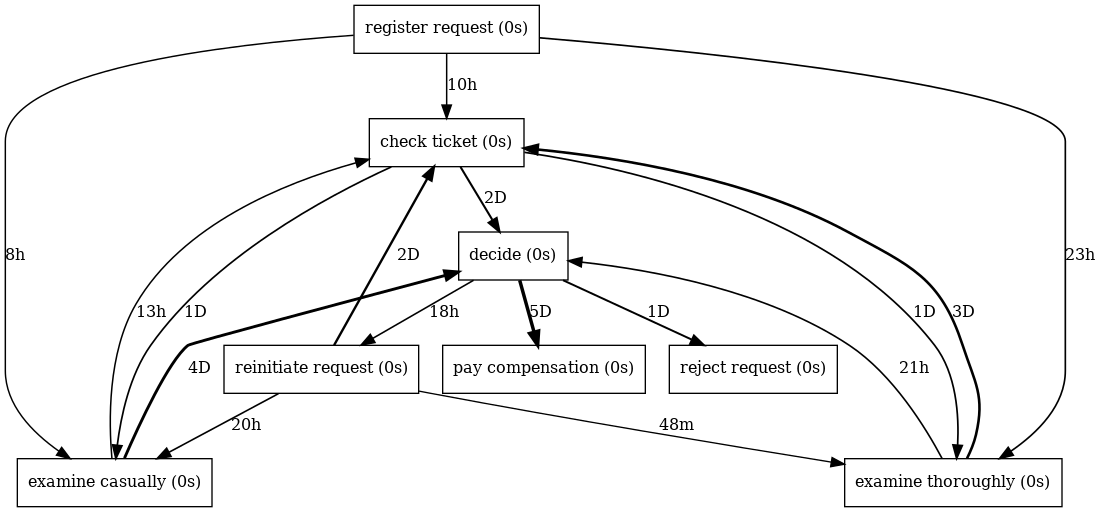

In [101]:
# Miner
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

# GraphViz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)

# Save
dfg_visualization.save(gviz, IMAGE_DIR / 'ProcessDiscovery/dfg_performance.png')

# View
dfg_visualization.view(gviz)

<br></br>
#### <b>3.3.1.2. Frequency<b>

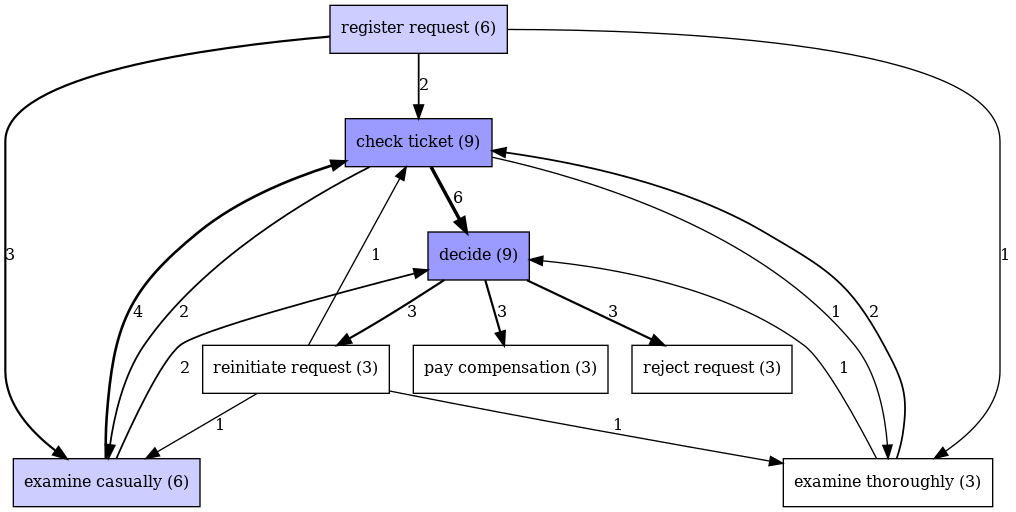

In [102]:
# Miner
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.FREQUENCY)

# GraphViz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)

# Save
dfg_visualization.save(gviz, IMAGE_DIR / 'ProcessDiscovery/dfg_frequency.png')

# View
dfg_visualization.view(gviz)

<br></br>
### <b>3.3.2 Convert "Directly-Follows Graph" to "Petri Net"</b>

#### <b>3.3.2.1. Performance<b>

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

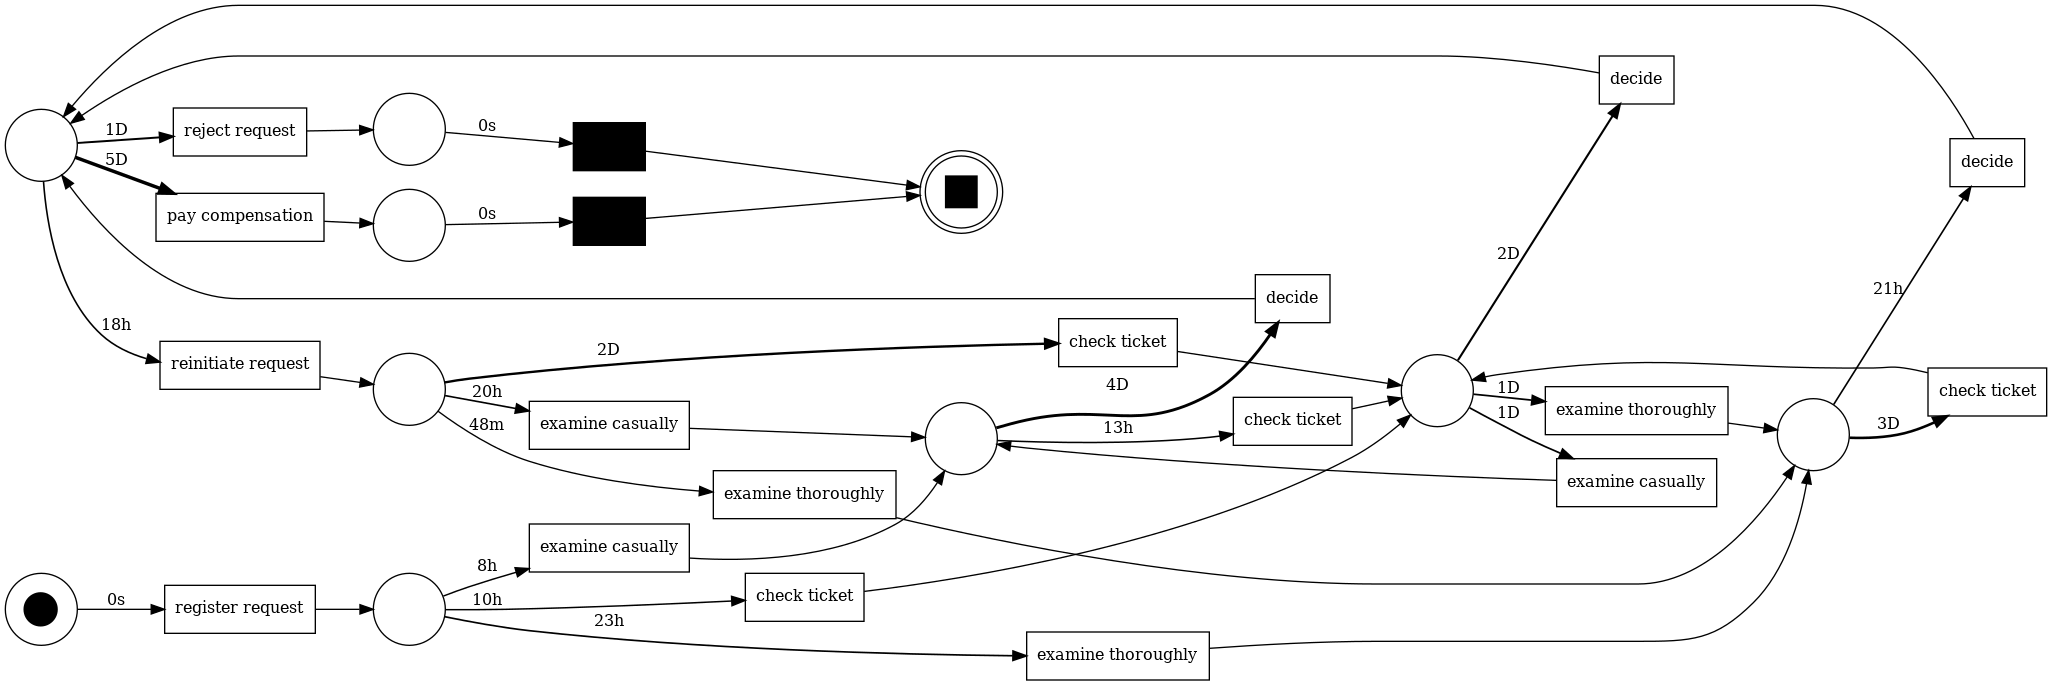

In [103]:
# Miner
dfg = dfg_discovery.apply(log, variant = dfg_discovery.Variants.PERFORMANCE)

# Convert
net, initial_marking, final_marking = dfg_converter.apply(dfg)

# GraphViz
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           variant = pn_visualizer.Variants.PERFORMANCE, 
                           log = log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/dfg_performance_petri.png')

# View
pn_visualizer.view(gviz)

<br></br>
#### <b>3.3.2.2. Frequency<b>

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

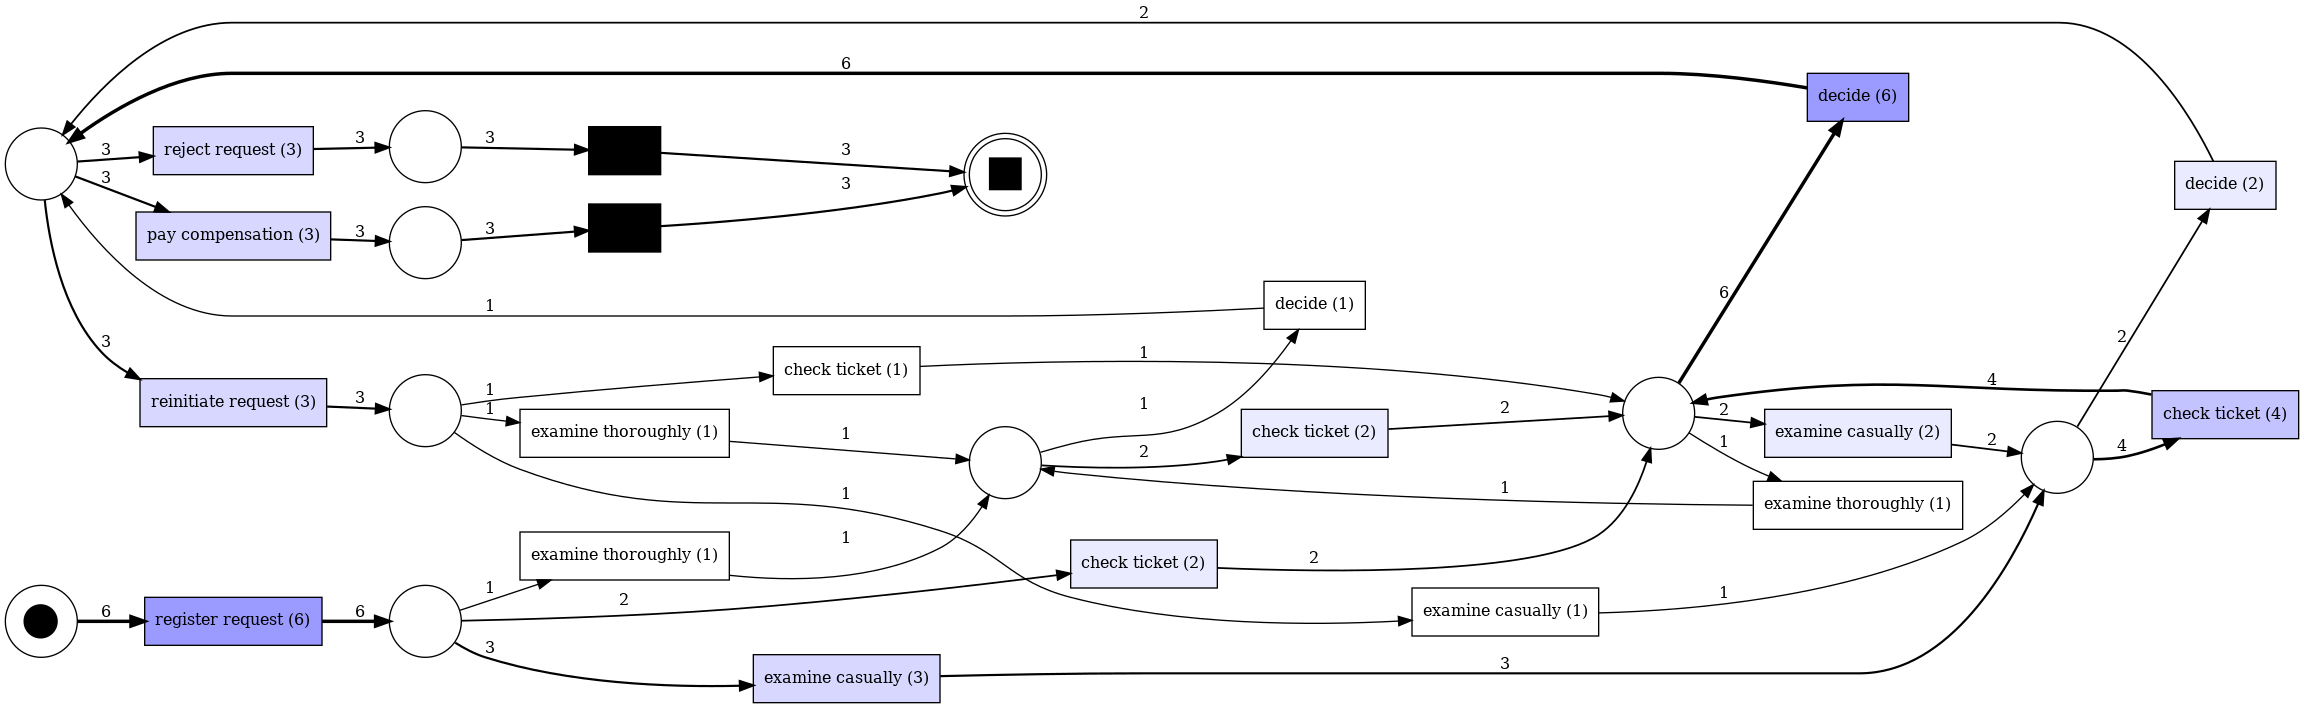

In [104]:
# Miner
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.FREQUENCY)

# Convert
net, initial_marking, final_marking = dfg_converter.apply(dfg)

# GraphViz
gviz = pn_visualizer.apply(net, initial_marking, final_marking,
                           variant = pn_visualizer.Variants.FREQUENCY, 
                           log = log)

# Save
pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/dfg_frequency_petri.png')

# View
pn_visualizer.view(gviz)

<br></br>
## <b>3.4. Interactive Process Map</b>

In [105]:
def heuristics_process_model(dependency_threshold, and_threshold, loop_two_threshold):
    # Parameters
    parameters = heuristics_miner.Variants.CLASSIC.value.Parameters

    # Miner
    petri_net, initial_marking, final_marking = heuristics_miner.apply(
        log,
        variant=heuristics_miner.Variants.CLASSIC, 
        parameters={
            parameters.DEPENDENCY_THRESH: dependency_threshold, 
            parameters.AND_MEASURE_THRESH: and_threshold,
            parameters.LOOP_LENGTH_TWO_THRESH: loop_two_threshold
        }
    )

    # GraphViz
    gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking,
                               variant=pn_visualizer.Variants.FREQUENCY, 
                               log=log)
    
    # Save
    pn_visualizer.save(gviz, IMAGE_DIR / 'ProcessDiscovery/heuristic_miner_4.png')
    
    # View
    vis_utils.view_image_in_jupyter(IMAGE_DIR / 'ProcessDiscovery/heuristic_miner_4.png')



interact(
    heuristics_process_model,

    dependency_threshold = widgets.FloatSlider(
        value=0.5, min=0, max=1, step=0.01, description='Dependency:', 
        disabled=False, continuous_update=False, orientation='horizontal', 
        readout=True, readout_format='.2f'
    ),

    and_threshold = widgets.FloatSlider(
        value=0.65, min=0, max=1, step=0.01, description='And:', 
        disabled=False, continuous_update=False, orientation='horizontal', 
        readout=True, readout_format='.2f'
    ),

    loop_two_threshold = widgets.FloatSlider(
        value=0.5, min=0, max=1, step=0.01, description='Loop Two:', 
        disabled=False, continuous_update=False, orientation='horizontal', 
        readout=True, readout_format='.2f'
    ),
)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='Dependency:', max=1.0, step…

<function __main__.heuristics_process_model(dependency_threshold, and_threshold, loop_two_threshold)>

<br></br>
## <b>3.5. Correlation Miner</b>

In Process Mining, we are used to have logs containing at least:

* A case identifier
* An activity
* A timestamp

The case identifier associates an event, happening to a system, to a particular execution of the process. This permits to apply algorithms such as process discovery, conformance checking, …

However, in some systems (for example, the data collected from IoT systems), it may be difficult to associate a case identifier. On top of these logs, performing classic process mining is impossible. Correlation mining borns as a response to the challenge to extract a process model from such event logs, that permits to read useful information that is contained in the logs without a case identifier, that contains only:

* An activity column
* A timestamp column

In this description, we assume there is a total order on events (that means that no events happen in the same timestamp). Situations where a total order is not defined are more complicated.


<i><b>The Correlation Miner is an approach proposed in:</b></i>

- <i>Pourmirza, Shaya, Remco Dijkman, and Paul Grefen. “Correlation miner: mining business process models and event correlations without case identifiers.” International Journal of Cooperative Information Systems 26.02 (2017): 1742002.</i>

<br>

In [106]:
df = log_csv[["concept:name", "time:timestamp"]]

frequency_dfg, performance_dfg = correlation_miner.apply(df, parameters={"pm4py:param:activity_key": "concept:name",
                                                                         "pm4py:param:timestamp_key": "time:timestamp"})

activities_freq = dict(df["concept:name"].value_counts())

In [107]:
gviz_freq = dfg_visualizer.apply(frequency_dfg, variant=dfg_visualizer.Variants.FREQUENCY, activities_count=activities_freq)
dfg_visualizer.view(gviz_freq)

NameError: name 'dfg_visualizer' is not defined

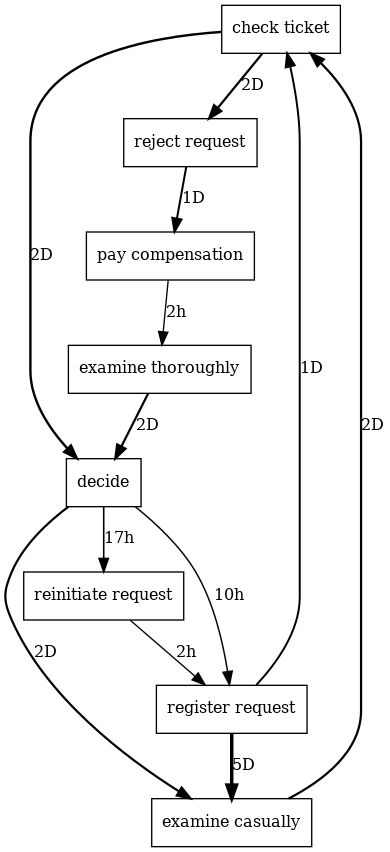

In [55]:
gviz_perf = dfg_visualizer.apply(performance_dfg, variant=dfg_visualizer.Variants.PERFORMANCE, activities_count=activities_freq)
dfg_visualizer.view(gviz_perf)

<br></br>
## <b>3.6. Temporal Profile</b>

The temporal profile model has been described in:

- <i>Stertz, Florian, Jürgen Mangler, and Stefanie Rinderle-Ma. "Temporal Conformance Checking at Runtime based on Time-infused Process Models." arXiv preprint arXiv:2008.07262 (2020).</i>

A temporal profile measures for every couple of activities in the log the <b>average time</b> and the <b>standard deviation</b> between events having the provided activities. The time is measured between the completion of the first event and the start of the second event. Hence, it is assumed to work with an interval log where the events have two timestamps. The output of the temporal profile discovery is a dictionary where each couple of activities (expressed as a tuple) is associated to a couple of numbers, the first is the average and the second is the average standard deviation.

In [49]:
emporal_profile = temporal_profile_discovery.apply(log)
emporal_profile

{('register request', 'examine thoroughly'): (284780.0, 276253.49011369975),
 ('register request', 'check ticket'): (408333.3333333333, 451219.44184620416),
 ('register request', 'decide'): (652780.0, 439329.53622537147),
 ('register request', 'reject request'): (933560.0, 564170.5954762265),
 ('examine thoroughly', 'check ticket'): (309090.0, 199785.94995644715),
 ('examine thoroughly', 'decide'): (282400.0, 225001.17066362122),
 ('examine thoroughly', 'reject request'): (484770.0, 191640.0798371781),
 ('check ticket', 'decide'): (466583.07692307694, 403657.74057123804),
 ('check ticket', 'reject request'): (629388.0, 503863.69299642934),
 ('decide', 'reject request'): (424536.0, 465092.1462248099),
 ('register request', 'examine casually'): (381880.0, 566217.0043366766),
 ('register request', 'pay compensation'): (1000220.0, 321246.6416945086),
 ('check ticket', 'examine casually'): (518472.0, 439733.4330250544),
 ('check ticket', 'pay compensation'): (875265.0, 333709.3323537716),
 

<br></br>
# <b>Resources:</b>
- PM4PY [documentation](https://pm4py.fit.fraunhofer.de/documentation)
- PM4Py [documentation](http://pm4py.pads.rwth-aachen.de/documentation/) (older version)
- Towards Data Science story [Introduction to Process Mining](https://towardsdatascience.com/introduction-to-process-mining-5f4ce985b7e5)
- Process Mining for Python on [Youtube](https://www.youtube.com/channel/UCRcgOKrDsntrTI78RXXliuw/videos)
- Wikipedia page [process mining](https://en.wikipedia.org/wiki/Process_mining)
- Wikipedia page [Petri net](https://en.wikipedia.org/wiki/Petri_net)
- Alpha Miner [video](https://www.futurelearn.com/info/courses/process-mining/0/steps/15636)
- Heuristics Miner [video](https://www.futurelearn.com/info/courses/process-mining/0/steps/15639)
- Inductive Miner [video](https://www.futurelearn.com/info/courses/process-mining/0/steps/15642)
- Workflow Net and Soundness [video](https://www.coursera.org/lecture/process-mining/2-5-workflow-nets-and-soundness-tBnqo)
- Process Mining Manifestio ([pdf-document](https://www.win.tue.nl/ieeetfpm/downloads/Process%20Mining%20Manifesto.pdf))
- Data Mining [Event Logs](https://data.4tu.nl/search?q=BPI)
